# 4. Data Preprocessing
In this part, we will learn how to process data that will be feed to machine learning algorithm

##### Using [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), that has missing value for the necessity of this module

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/henseljahja/learn-ml/main/Dataset/iris_2_class_modified.csv")

and We dont need the class for now, so we will drop the class

In [3]:
df.drop(columns="species",inplace=True)

## 4.1 Data Cleaning

### 4.1.1 Simple Imputer

Simple imputer Imputation transformer for completing missing values.
the documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [4]:
import numpy as np
# finding all the index
df_nan_value = np.where(df.isnull() == True)[0]
df.loc[df_nan_value]

,sepal_length,sepal_width,petal_length,petal_width
13,6.1,NaN,4.7,1.4
19,5.6,NaN,3.9,1.1
26,6.8,NaN,4.8,1.4
32,5.8,2.7,NaN,1.2
33,NaN,2.7,5.1,1.6
37,6.3,2.3,NaN,1.3
40,NaN,2.6,4.4,1.2
50,NaN,3.3,6.0,2.5
60,6.5,3.2,NaN,2.0
62,6.8,3.0,NaN,2.1


In [5]:
#Importing Simple Imputer
from sklearn.impute import SimpleImputer



    If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

    If “median”, then replace missing values using the median along each column. Can only be used with numeric data.

    If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

    If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.


In [6]:
#si means Simple Imputer

#Using the Mean value
si_mean = SimpleImputer(strategy="mean")

#Using the Median value
si_median = SimpleImputer(strategy="median")

#Using the most frequent value
si_most_frequent = SimpleImputer(strategy="most_frequent")

#Custom imputer
si_constant = SimpleImputer(strategy="constant", fill_value=999)

In [7]:
#using the si_mean
df_si_mean = si_mean.fit_transform(df)
pd.DataFrame(data=df_si_mean[df_nan_value],columns=df.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,6.100000,2.872917,4.700000,1.4
1,5.600000,2.872917,3.900000,1.1
2,6.800000,2.872917,4.800000,1.4
3,5.800000,2.700000,4.901053,1.2
4,6.267368,2.700000,5.100000,1.6
5,6.300000,2.300000,4.901053,1.3
6,6.267368,2.600000,4.400000,1.2
7,6.267368,3.300000,6.000000,2.5
8,6.500000,3.200000,4.901053,2.0
9,6.800000,3.000000,4.901053,2.1


In [8]:
#using the si_median
df_si_median = si_median.fit_transform(df)
pd.DataFrame(data=df_si_median[df_nan_value],columns=df.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,6.1,2.9,4.7,1.4
1,5.6,2.9,3.9,1.1
2,6.8,2.9,4.8,1.4
3,5.8,2.7,4.9,1.2
4,6.3,2.7,5.1,1.6
5,6.3,2.3,4.9,1.3
6,6.3,2.6,4.4,1.2
7,6.3,3.3,6.0,2.5
8,6.5,3.2,4.9,2.0
9,6.8,3.0,4.9,2.1


In [9]:
#using the si_most_frequent
df_si_most_frequent = si_most_frequent.fit_transform(df)
pd.DataFrame(data=df_si_most_frequent[df_nan_value],columns=df.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,6.1,3.0,4.7,1.4
1,5.6,3.0,3.9,1.1
2,6.8,3.0,4.8,1.4
3,5.8,2.7,4.5,1.2
4,6.3,2.7,5.1,1.6
5,6.3,2.3,4.5,1.3
6,6.3,2.6,4.4,1.2
7,6.3,3.3,6.0,2.5
8,6.5,3.2,4.5,2.0
9,6.8,3.0,4.5,2.1


In [10]:
#using the si_constant
df_si_constant = si_constant.fit_transform(df)
pd.DataFrame(data=df_si_constant[df_nan_value],columns=df.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,6.1,999.0,4.7,1.4
1,5.6,999.0,3.9,1.1
2,6.8,999.0,4.8,1.4
3,5.8,2.7,999.0,1.2
4,999.0,2.7,5.1,1.6
5,6.3,2.3,999.0,1.3
6,999.0,2.6,4.4,1.2
7,999.0,3.3,6.0,2.5
8,6.5,3.2,999.0,2.0
9,6.8,3.0,999.0,2.1


## 4.2 Feature Scalling

##### For this we will use the dataframe that contains no missing value, 

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/henseljahja/learn-ml/main/Dataset/iris_2_class.csv")

In [12]:
df.drop("species",axis=1,inplace=True)

### 4.2.2 Standardization (Z-score Normalization)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/b0aa2e7d203db1526c577192f2d9102b718eafd5)

In machine learning, we can handle various types of data, e.g. audio signals and pixel values for image data, and this data can include multiple dimensions. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and artificial neural networks). The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation. Source : [Wikipedia](https://en.wikipedia.org/wiki/Feature_scaling)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df)

In [14]:
pd.DataFrame(df, columns = df.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,7.0,3.2,4.7,1.4
1,6.4,3.2,4.5,1.5
2,6.9,3.1,4.9,1.5
3,5.5,2.3,4.0,1.3
4,6.5,2.8,4.6,1.5
...,...,...,...,...
95,6.7,3.0,5.2,2.3
96,6.3,2.5,5.0,1.9
97,6.5,3.0,5.2,2.0
98,6.2,3.4,5.4,2.3


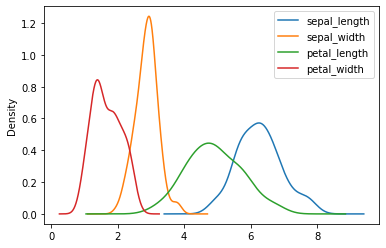

In [15]:
#Before Standard Scalling
df.plot.kde()

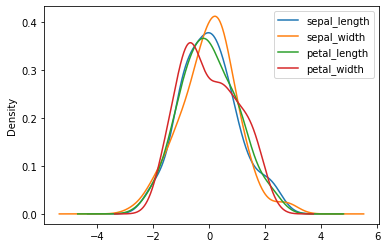

In [16]:
#After Standard Scalling
pd.DataFrame(df_sc, columns = df.columns).plot.kde()

### 4.2.2 Rescaling (min-max normalization) 

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/358923abc154221bb5022fc329061f6fc4dcc69f)

Also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. Source : [Wikipedia](https://en.wikipedia.org/wiki/Feature_scaling)

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_mms = mms.fit_transform(df)

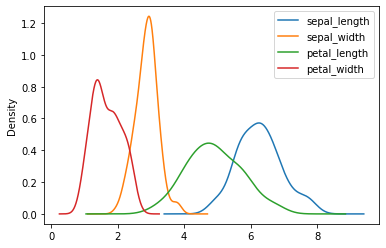

In [18]:
df.plot.kde()

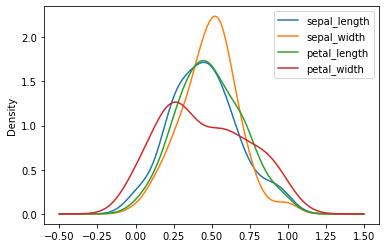

In [19]:
pd.DataFrame(df_mms, columns = df.columns).plot.kde()

## 4.3 Pipeline

Let's say you have created a perfect preprocessing step, but you got a new data for preprocessing, repeating each would be tiring, so the solution is to set a Pipeline

This is a Pipeline with Imputer, Feature Scalling, and simple predictor

In [20]:
from sklearn.pipeline import Pipeline

#Define each steps
df_pipeline = Pipeline([
                ("imputer" , SimpleImputer(strategy="median")),
                ("scaler" , StandardScaler())

                ])

In [21]:
df_pipeline.fit_transform(df)

array([[ 1.11900931,  0.99068792, -0.25077906, -0.65303909],
       [ 0.20924564,  0.99068792, -0.49425387, -0.41643072],
       [ 0.96738203,  0.68864892, -0.00730424, -0.41643072],
       [-1.15539985, -1.72766308, -1.10294091, -0.88964745],
       [ 0.36087292, -0.21746808, -0.37251647, -0.41643072],
       [-0.8521453 , -0.21746808, -0.49425387, -0.88964745],
       [ 0.05761837,  1.29272692, -0.25077906, -0.17982236],
       [-2.06516352, -1.42562408, -1.95510276, -1.59947255],
       [ 0.5125002 ,  0.08457092, -0.37251647, -0.88964745],
       [-1.61028169, -0.51950708, -1.22467832, -0.65303909],
       [-1.91353624, -2.63378009, -1.71162795, -1.59947255],
       [-0.54889074,  0.38660992, -0.8594661 , -0.41643072],
       [-0.39726347, -2.02970209, -1.10294091, -1.59947255],
       [-0.24563619,  0.08457092, -0.25077906, -0.65303909],
       [-1.00377258,  0.08457092, -1.58989054, -0.88964745],
       [ 0.66412748,  0.68864892, -0.61599128, -0.65303909],
       [-1.00377258,  0.

In [22]:
df_after_pipeline = pd.DataFrame(df_pipeline.fit_transform(df), columns = df.columns) 

In [23]:
df_after_pipeline

,sepal_length,sepal_width,petal_length,petal_width
0,1.119009,0.990688,-0.250779,-0.653039
1,0.209246,0.990688,-0.494254,-0.416431
2,0.967382,0.688649,-0.007304,-0.416431
3,-1.155400,-1.727663,-1.102941,-0.889647
4,0.360873,-0.217468,-0.372516,-0.416431
...,...,...,...,...
95,0.664127,0.386610,0.357908,1.476436
96,0.057618,-1.123585,0.114433,0.530003
97,0.360873,0.386610,0.357908,0.766611
98,-0.094009,1.594766,0.601383,1.476436


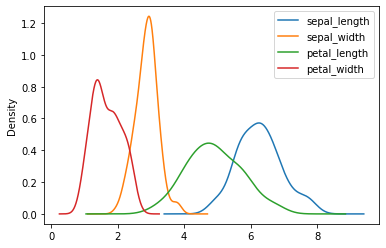

In [24]:
#Before Pipeline
df.plot.kde()

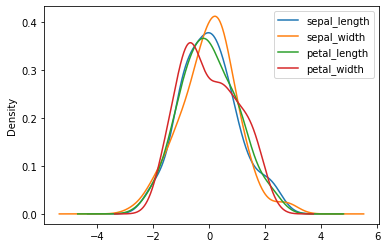

In [25]:
#After Pipeline
df_after_pipeline.plot.kde()